# ***Predicting the Stock Prices for State Bank of India  with LSTM Model***

**Intuition:** We will download the stock market data from Yahoo Finance. Then, after splitting the dataset into Training & Test Set, we will train our LSTM model on the Training Set & later use it predict on the Test Set. Lastly, we will plot the predicted stock prices against the real test values. RMSE is not really necessary to be calculated since we want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close to the real stock price.

### **Importing the required libraries & packages**

In [0]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

### **Downloading 'State Bank of India's Stock Market Data from Yahoo Finance**

In [0]:
dataset = yf.download('SBIN.NS','2012-01-01','2019-11-01')

[*********************100%***********************]  1 of 1 completed


In [0]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,162.899994,163.600006,161.139999,162.764999,89.596375,14464990
2012-01-03,164.399994,171.000000,164.300003,170.565002,93.889992,21341020
2012-01-04,171.199997,171.389999,167.520004,169.604996,93.361534,22241630
2012-01-05,169.600006,171.854996,168.005005,169.244995,93.163368,21344840
2012-01-06,167.500000,170.759995,165.804993,167.274994,92.078941,21137420


In [0]:
dataset.count()

Open         1926
High         1926
Low          1926
Close        1926
Adj Close    1926
Volume       1926
dtype: int64

### **Splitting the data into Training Set & Test Set**

In [0]:
training_set = pd.DataFrame()
test_set = pd.DataFrame()

if dataset.shape[0] > 1850: 
    training_set = dataset[:1850]
    test_set = dataset[1850:]


### **Extracting 'Open' data column**

In [0]:
training_set_extracted = training_set.iloc[:, 1:2].values
pd.DataFrame(training_set_extracted).head()

,0
0,163.600006
1,171.000000
2,171.389999
3,171.854996
4,170.759995


In [0]:
test_set_extracted = test_set.iloc[:, 1:2].values
pd.DataFrame(test_set_extracted).head()

,0
0,361.500000
1,364.000000
2,366.549988
3,365.000000
4,366.000000


### **Feature Scaling the Training Set**

In [0]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_extracted)
pd.DataFrame(training_set_scaled)

,0
0,0.067123
1,0.099996
2,0.101728
3,0.103794
4,0.098929
...,...
1845,0.969348
1846,0.988006
1847,1.000000
1848,0.977122


### **Creating a Data Structure with 60 Time Steps & 1 Output**

In [0]:
X_train = []
y_train = []
for i in range(60, 1850):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### **Reshaping 'X_train' to create New Dimensionality**

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.06712274],
        [0.09999553],
        [0.10172802],
        ...,
        [0.29945355],
        [0.30518412],
        [0.28275063]],

       [[0.09999553],
        [0.10172802],
        [0.10379366],
        ...,
        [0.30518412],
        [0.28275063],
        [0.26433739]],

       [[0.10172802],
        [0.10379366],
        [0.09892936],
        ...,
        [0.28275063],
        [0.26433739],
        [0.27764204]],

       ...,

       [[0.77833062],
        [0.75856245],
        [0.74279244],
        ...,
        [0.96179643],
        [0.96934835],
        [0.98800581]],

       [[0.75856245],
        [0.74279244],
        [0.7487894 ],
        ...,
        [0.96934835],
        [0.98800581],
        [1.        ]],

       [[0.74279244],
        [0.7487894 ],
        [0.74145968],
        ...,
        [0.98800581],
        [1.        ],
        [0.97712232]]])

### **Configuring Keras**

In [0]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

### **Initialzing the RNN**

In [0]:
model = Sequential()

### **Creating the 1st LSTM layer and some Dropout Regularisation**

In [0]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### **Creating the 2nd LSTM layer and some Dropout Regularisation**

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

### **Creating the 3rd LSTM layer and some Dropout Regularisation**

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

### **Creating the 4th LSTM layer and some Dropout Regularisation**

In [0]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

### **Creating the Output layer**

In [0]:
model.add(Dense(units = 1))

### **Compiling the RNN Model**

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### **Fitting the Model to the Training Set**

In [0]:
model.fit(X_train, y_train, epochs = 500, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500




1790/1790 [==============================] - 14s 8ms/step - loss: 0.0329
Epoch 2/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0084
Epoch 3/500
1790/1790 [==============================] - 10s 6ms/step - loss: 0.0072
Epoch 4/500
1790/1790 [==============================] - 10s 6ms/step - loss: 0.0063
Epoch 5/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0065
Epoch 6/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0056
Epoch 7/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0055
Epoch 8/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0049
Epoch 9/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0051
Epoch 10/500
1790/1790 [==============================] - 11s 6ms/step - loss: 0.0047
Epoch 11/500
1790/1790 [=========================

### **Predicting on the Text Set**

In [0]:
dataset_total = pd.concat((training_set['Open'], test_set['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 136):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
pd.DataFrame(predicted_stock_price).head()

,0
0,351.728516
1,355.722382
2,352.760742
3,355.161011
4,355.339966


### **Visualizing the results**

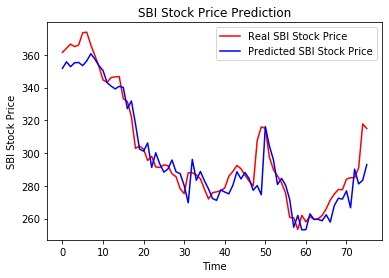

In [0]:
plt.plot(test_set_extracted, color = 'red', label = 'Real SBI Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()